In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [13]:
df=pd.read_csv('gender_submission.csv') # 3 farklı veri seti ile çalıştığım için ilkini import ettim

In [14]:
df.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [17]:
uploaded = files.upload()
uploaded = files.upload()


Saving test.csv to test.csv


Saving train.csv to train.csv


In [18]:
df=pd.read_csv('test.csv')         # ikinci ve üçüncü veri setlerimi import ettim
df=pd.read_csv('train.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [19]:
print(df.isnull().sum())   #sütunlardaki eksik değerleri kontrol ettim.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
df.drop(columns=['Cabin'], inplace=True)  #Sütundaki kabin parametresinin kayıp değeri çok olduğu için kaldırma kararı aldım.Tahminimde çok da işe yaramayacaktı zaten.


In [21]:
median_age = df['Age'].median()                  #Yaşı medyana atadım.Eksik değerleri vardı çünkü.
df['Age'].fillna(median_age, inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [22]:
print(df.isnull().sum())  #Tekrardan kontrol ettim eksik değerlerimi.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [28]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])  # 'Sex' ve 'Embarked' sütunlarını kategorik değişkenlerden derste öğrendiğim gibi sayısal değerlere dönüştürdüm.


In [29]:
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)  #Burada amacım dışındaki x eksenindeki parametreleri kaldırdım verileri daha sade görmek için.
y = df['Survived']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
print(y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


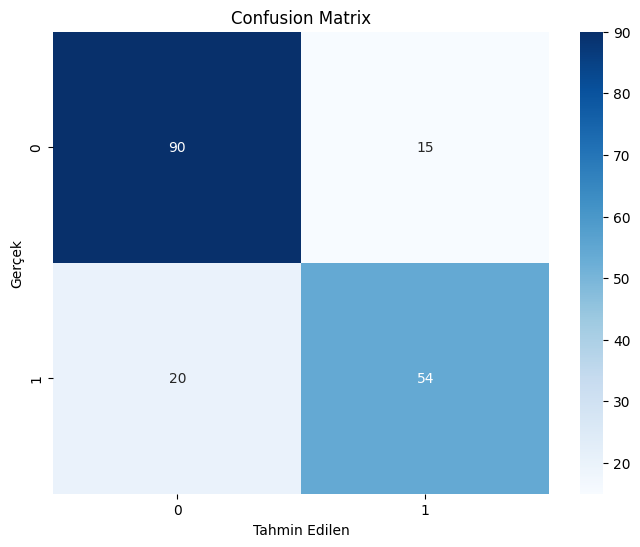

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()


Lojistik regresyon modelini kullandığımda,test set ve train set arasında çok büyük bir fark görmediğim için overfitting veya underfittingten bahsedebileceğimizi zannetmiyorum.Extra yorum olarak  doğruluk oranının düşük olduğunu belirtebilrim.

In [34]:
train_accuracy_log = accuracy_score(y_train, log_reg.predict(X_train))

# doğruluk dğeri hesapladım
test_accuracy_log = accuracy_score(y_test, log_reg.predict(X_test))

print("Lojistik Regresyon Train Set Doğruluğu:", train_accuracy_log)
print("Lojistik Regresyon Test Set Doğruluğu:", test_accuracy_log)

Lojistik Regresyon Train Set Doğruluğu: 0.6601123595505618
Lojistik Regresyon Test Set Doğruluğu: 0.6312849162011173


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Lineer ile benzer sonuçlara sahipler.


In [52]:
from sklearn.metrics import precision_score, recall_score

y_pred_binary = (y_pred > 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)


print("Lojistik Regresyon Precision:", precision)
print("Lojistik Regresyon Recall:", recall)

Lojistik Regresyon Precision: 0.7681159420289855
Lojistik Regresyon Recall: 0.7162162162162162


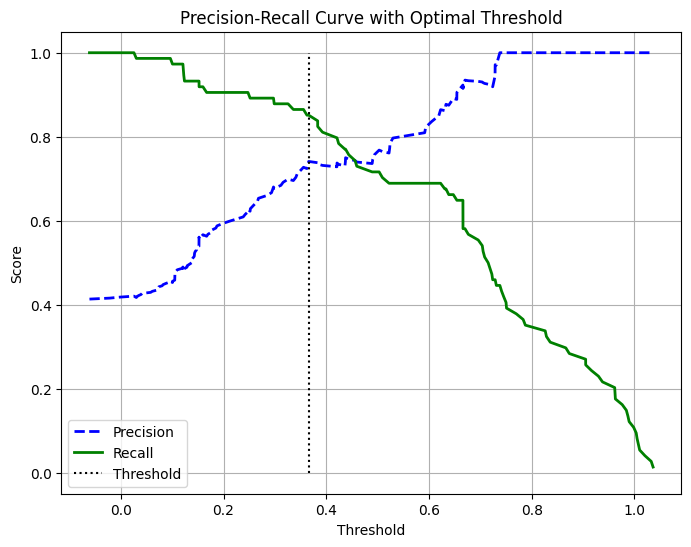

In [58]:
import numpy as np


f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])
optimal_threshold = thresholds_pr[np.argmax(f1_scores)]
plt.figure(figsize=(8, 6))
plt.plot(thresholds_pr, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds_pr, recall[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(optimal_threshold, 0, 1.0, "k", "dotted", label="Threshold")
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve with Optimal Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print(y_pred)

[ 0.12091262  0.24665294  0.14287467  0.86649054  0.7188075   0.96302352
  0.66616989  0.08752867  0.72250701  0.93799029  0.34931914  0.03024501
  0.48944033  0.16709731  0.22407065  0.97632758  0.32565071  0.66619814
  0.26632349  0.34083819  0.12408522  0.39279452  0.62270586  0.14333826
  0.10766126  0.04121761  0.43646332  0.24754445  0.06938616  0.60522765
  0.14755902  0.64744333  0.49386133  0.61920345  0.15230877  0.14490063
  0.42415467  0.66616989  0.99860087  0.10530618  0.23834872  0.0614494
  0.10536117  0.15214932  0.5936989   0.07350032  0.14765263  0.12925398
  0.12378361  0.34331545  0.70548463  0.78774955 -0.06105847  0.45608855
 -0.02155679  0.96171578  0.24195818  0.96234212  0.74563882  0.70846881
  0.13812642  0.82881308  0.74142624  0.4207402   0.15214932  0.63860977
  0.31606653  0.100604    0.16969623  0.87331271  0.73124022  1.02057813
  0.50300273  0.9165134   0.12876515  0.03161871  0.654433    1.00360502
  0.72870171  0.52353597 -0.00203085  0.77006304  0.

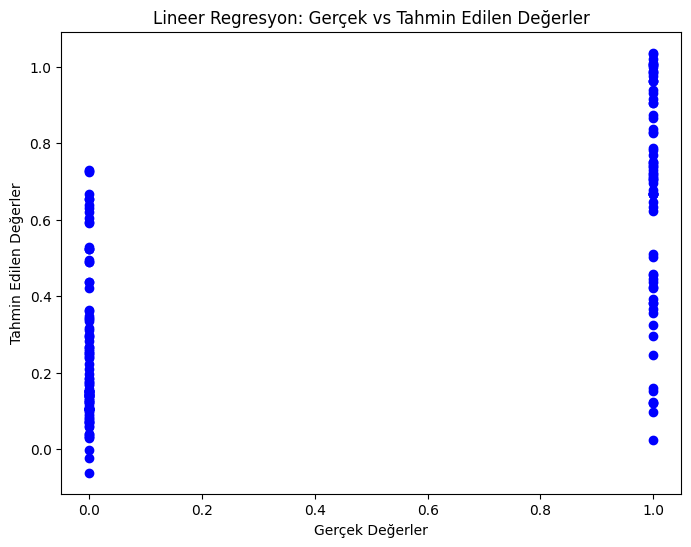

In [36]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(8, 6))
plt.scatter(results['Actual'], results['Predicted'], color='blue')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Lineer Regresyon: Gerçek vs Tahmin Edilen Değerler')
plt.show()



Lineer regresyon metodumuzda Overfitting ve underfittingten ziyade genel olarak çok kötü bir performans aldığımı söyleyebilirim.Genel olarak çok kötü tahminler aldım.Underfitting diyebilirim.

In [37]:
from sklearn.metrics import r2_score

# Train set üzerinde R-kare değerini hesaplattım.
train_r2 = r2_score(y_train, lin_reg.predict(X_train))

# Test set üzerinde R-kare değerini hesaplattım.
test_r2 = r2_score(y_test, y_pred)

print("Lineer Regresyon Train Set R-kare Değeri:", train_r2)
print("Lineer Regresyon Test Set R-kare Değeri:", test_r2)         #1'e ne kadar yakınsa,o kadar iyi.


Lineer Regresyon Train Set R-kare Değeri: 0.3839329617538739
Lineer Regresyon Test Set R-kare Değeri: 0.44299788564056786


In [41]:
from sklearn.metrics import precision_score, recall_score

y_pred_binary = (y_pred > 0.5).astype(int)

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)


print("Lineer Regresyon Precision:", precision)
print("Lineer Regresyon Recall:", recall)


Lineer Regresyon Precision: 0.7681159420289855
Lineer Regresyon Recall: 0.7162162162162162


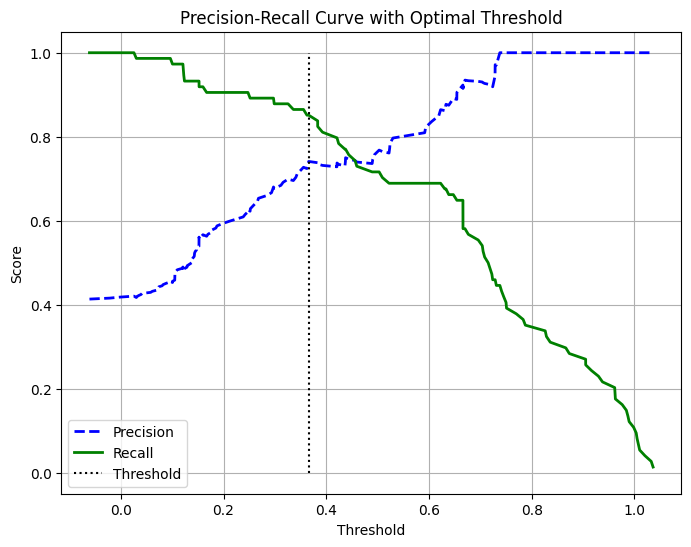

In [46]:
# F1 scorunu hesaplattım
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1])

# F1-scoreun maksimum olduğu threshold değerini buldum
import numpy as np
optimal_threshold = thresholds_pr[np.argmax(f1_scores)]

# Grafik oluşturdum
plt.figure(figsize=(8, 6))
plt.plot(thresholds_pr, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds_pr, recall[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(optimal_threshold, 0, 1.0, "k", "dotted", label="Threshold")
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve with Optimal Threshold')
plt.legend()
plt.grid(True)
plt.show()


Optimal Threshould değerimizi bulduk burada.

In [50]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Precision ve Recall değerlerini hesaplattım
precision, recall, thresholds_pr = precision_recall_curve(y_true, y_scores)

# F1 scorunu hesaplattım
f1_scores = 2 * (precision * recall) / (precision + recall)

# max threshould buldum
optimal_threshold = thresholds_pr[np.argmax(f1_scores)]

print("Optimal Threshold:", optimal_threshold)


Optimal Threshold: 0.3


Decision Tree Modeli Doğruluğu: 0.7821229050279329

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179


Karışıklık Matrisi:
 [[84 21]
 [18 56]]


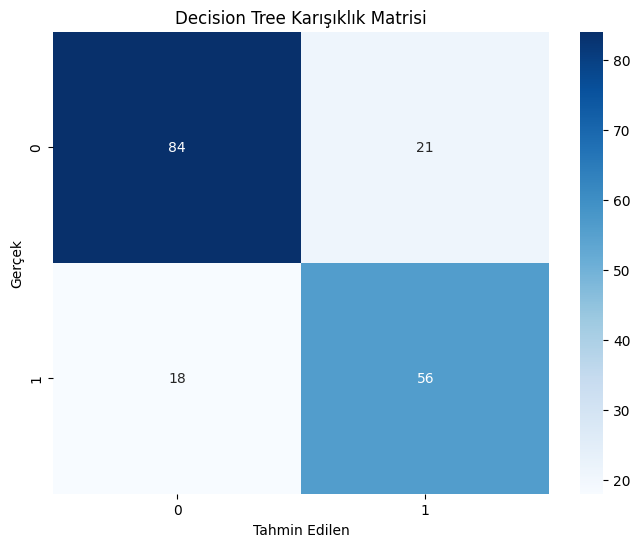

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# DT modelimi tanımladım
tree = DecisionTreeClassifier()

# Modeli eğittim burada
tree.fit(X_train, y_train)

# test setim üzerinden tahmin yaptım
y_pred_tree = tree.predict(X_test)

# accuracy değerini değerledirdim
accuracy = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Modeli Doğruluğu:", accuracy)

# Sınıflandırma raporu ve karışıklık matrisi için
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred_tree))
print("\nKarışıklık Matrisi:\n", confusion_matrix(y_test, y_pred_tree))

# Sınıflandırma raporu ve karışıklık matrisi için görselleştirdim
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Decision Tree Karışıklık Matrisi')
plt.show()


Decision tree modelinde train setimizin doğruluğu test setimizin doğruluğundan fazla çıktı.Overfitting durumunu düşünebiliriz.Modelim train setimdeki veriler ile iyi uyum sağlamış gözüküyor.Belki bu durum yeni gelen verilerin tahminini zorlaştırabilir.

In [ ]:
from sklearn.metrics import accuracy_score

# Train set üzerinde doğruluk değerini hesapladım
train_accuracy_tree = accuracy_score(y_train, tree.predict(X_train))

# Test set üzerinde doğruluk değerini hesapladım
test_accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Decision Tree Train Set Doğruluğu:", train_accuracy_tree)
print("Decision Tree Test Set Doğruluğu:", test_accuracy_tree)


Decision Tree Train Set Doğruluğu: 0.9789325842696629
Decision Tree Test Set Doğruluğu: 0.7821229050279329


Random forest modelinin SGD ye göre daha yüksek bir doğruluk oranı verdiğini görebiliyoruz.Random Forest modeli, SGDClassifier modeline göre hem daha yüksek bir recall değeri (%0.77'ye karşılık %0.16) hem de daha iyi bir şekilde pozitif örnekleri doğru bir şekilde tanıma yeteneği göstedi. Yüksek recall değeri, modelin gerçek pozitifleri daha iyi tanıdığını gösterdi.Random Forest modeli, SGDClassifier modeline göre daha yüksek bir precision değeri elde edildi. (%0.79'a karşılık %0.70). Yüksek precision değeri, modelin pozitif olarak tahmin ettiği örneklerin gerçekten pozitif olma olasılığının yüksek olduğunu gösteriyor bizlere.RANDOMFOREST modelinin daha iyi performans gösterdiğini söyleyebilirim.


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

# sgd modelini tanıttım ve aynı zamanda eğittim
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

# randomforest metodunu tanıttım ve eğittim
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# sgd ile tahmin yaptırdım
y_pred_sgd = sgd_clf.predict(X_test)

# random forest ile tahmin yaptırdım
y_pred_rf = rf_clf.predict(X_test)

# değerleri hesaplatıp yazdırdım
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)

print("SGDClassifier Modeli:")
print("Accuracy:", accuracy_sgd)
print("Recall:", recall_sgd)
print("Precision:", precision_sgd)
print("\nRandom Forest Modeli:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)


SGDClassifier Modeli:
Accuracy: 0.6256983240223464
Recall: 0.16216216216216217
Precision: 0.7058823529411765

Random Forest Modeli:
Accuracy: 0.8212290502793296
Recall: 0.7702702702702703
Precision: 0.7916666666666666
